   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc
Accuracy: 0.9710982658959537

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91    

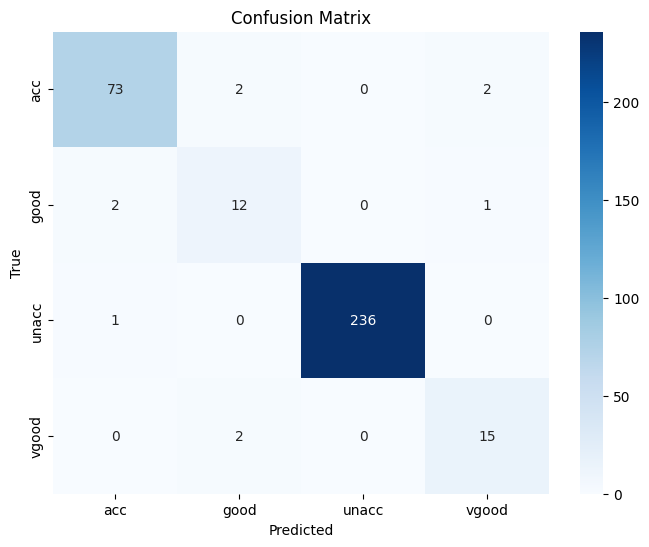

Accuracy for each fold:  [0.97109827 0.95953757 0.97971014 0.97101449 0.9826087 ]
Mean Accuracy:  0.9727938342967244


In [11]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score

# Load the dataset
data = pd.read_csv('car-info.csv')

# Preview the dataset
print(data.head())

# Assign column names
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Preview the dataset after column assignment
print()
print(data.head())

# Convert categorical data to numerical using LabelEncoder
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store label encoders for future use

# Split the data into features (X) and target (y)
X = data.drop('class', axis=1)  # Features (all columns except 'class')
y = data['class']  # Target (the 'class' column)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix for viewing purpose
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['class'].classes_, yticklabels=label_encoders['class'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Set up K-fold Cross Validation (let's use 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate the accuracy for each fold
scores = cross_val_score(dt_classifier, X, y, cv=kf, scoring='accuracy')

# Print each fold's accuracy
print("Accuracy for each fold: ", scores)

# Calculate and print the mean accuracy across all folds
print("Mean Accuracy: ", np.mean(scores))